# Introduction

Plutot que de présenter le machine learning par la théorie, nous allons parler ici directement de la pratique en présentant le package scikit-learn. Le but est de parcourir ses principales classes et méthodes

Il y a trois grandes classes dans Scikit-learn:
- **`Estimateur`** : ce sont les différents modèles de Machine Learning proposés par scikit learn
- **`Transformeur`** : ce sont les outils permettant de transformer les données en vue du modèle de MachineLearning
- **`Pipeline`**: Il permet de combiner transformeur et estimateur pour appliquer le même trainement aux jeux de train et de test.


# I La classe estimateur

Tout modèle de machine learning, qu'il soit un modèle de regression, de classification ou de clustering (voir un transformer) correspond à un objet [estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn.base.BaseEstimator). 

On retrouve ainsi dans scikit-learn les modèles suivant:
- LinearRegression(), Ridge(), Lasso(), Elasticnet(), LogisticRegression(), RidgeClassifier() ... dans [linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
- KNeighborsClassifier(), KNeighborsRegressor() ... dans [neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
- SVC() dans [svm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
- GradientBoostingClassifier(), GradientBoostingRegressor(), IsolationForest(),RandomForestClassifier(), RandomForestRegressor() ... dans [ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
- GaussianNB() ... dans [nayve_bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)

Les seuls grands models absents de ce package sont Xgboost(qui est un package), Catboost, lightgbm et les réseaux de neurones (qu'on travaillera avec Pytorch ou Tensorflow)

Comme tous les modèles sont issus de la même classe, ils possèdent tous 4 méthodes qui vont permettre de les travailler de la même façon:
1. L'initialisation qui permet de créer le modèle et qui prend en input ses hyper-paramètres
2. L'entrainement qui prend en input un dataframe de variables explicatives (X) et pour les modèles supervisés un dataframe cible (y)
3. L'évaluation qui prend en input un dataframe de variables explicatives (X) et pour les modèles supervisés un dataframe cible (y)
4. La prédiction qui prend en input uniquement un dataframe de variables explicatives (X)

## 0. Création du dataset

In [2]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

# On va utiliser un data set ou l'objectif sera de prédire le cout d'une assurance maladie 
# en fonction de l'age de la personne et de son indice de masse corporelle

df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot: title={'center': 'prix en fonction des m2 habitable'}, xlabel='sqft_living', ylabel='price'>

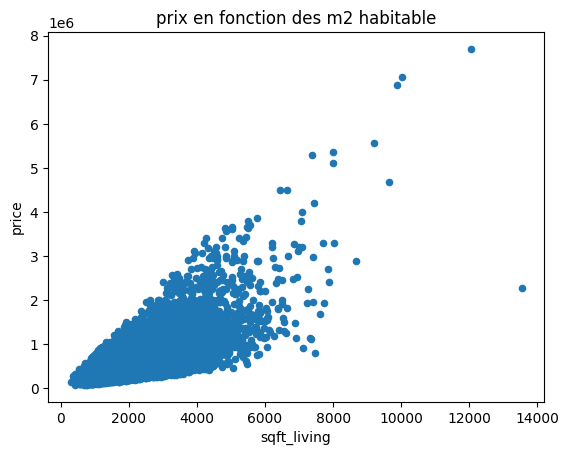

In [6]:
df.plot(kind="scatter", x= "sqft_living", y="price", title="prix en fonction des m2 habitable")

<AxesSubplot: title={'center': 'prix en fonction du nombre de chambres'}, xlabel='bedrooms', ylabel='price'>

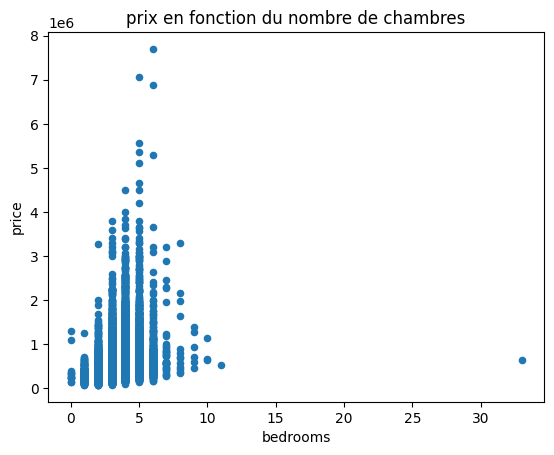

In [15]:
df.plot(kind="scatter", x= "bedrooms", y="price", title="prix en fonction du nombre de chambres")

## 1. Initialisation d'un estimateur

On crée nos jeux

In [50]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

On commence par importer le modèle qu'on souhaite utiliser. On l'initialise en définissant ses hyperparamètres.

Ici on va prendre l'exemple de la régression linéaire regularisée à l'aide par Ridge qui prend un seul paramètre "alpha".

In [51]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=4)

print(model, type(model))

KNeighborsRegressor(n_neighbors=4) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


On obtient bien un objet de la classe Ridge.

## 2. Entrainer le modèle avec la méthode .fit()

In [52]:

trained_model = model.fit(X_train,y_train)

print(trained_model, type(trained_model))

KNeighborsRegressor(n_neighbors=4) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


## 3. Evaluer le modèle avec la méthode .score()

In [53]:
trained_model.score(X_test,y_test)

0.44134445986511184

## 4. Prédire avec la méthode .predict()

In [40]:

predict = trained_model.predict(X_test.head(1))
real = y.head(1).values

print(f"la valeur prédite est {predict}, alors que la valeur réelle est {real}")

la valeur prédite est [535000.], alors que la valeur réelle est [221900.]


# II La classe transformeur

La plupart du temps les données ont besoin d'être transformée avant de pouvoir être utilisées dans un modèle de Machine Learning, on appelle cela le **`preprocessing`**.

Il est de [plusieurs sortes](https://scikit-learn.org/stable/data_transforms.html):
- **`Standardisation et Normalisation`**: visent à uniformiser les valeurs des données
- **`Encoding et discrétisation`**: transforment toutes les variables explicatives au format numérique
- **`Imputation`**: gérent les valeurs manquantes
- **`Extraction et generation`**: créent de nouvelles données à partir des données initiales
- **`Selection, Reduce et expand`**: selectionnent le bon nombre de variables explicatives et les bonnes variables explicatives.


Comme pour l'estimateur, ces classes partagent des méthodes communes:
- **`initialisation`**
- **`fit`**: pour développer une fonction de transformation
- **`transform`**: pour appliquer la fonction développée
- **`fit_transform`**: pour développer la transformation puis pour l'appliquer directement

Pourquoi séparer le fit du transform?  -> a cause du danger du **`dataleaking`**
Sur le jeu de train, on veut créer les transformateurs, par exemple le min-max scaler permet de transformer toutes les données entre 0 et 1 en soustrayant par le minimum et en divisant par le maximum. Cependant ces deux valeurs sont celles du jeu de train, pas celles du jeu en entier, car on n’a pas le droit de se servir des données du test (data-leaking). Il faut donc:
- fit sur les valeurs trains et transform (d’ou fit-transform)
- uniquement faire transform sur les valeurs du test.

In [47]:
# initialisation
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

# pre-processing de X_train
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

# Entrainement sur X_train
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
trained_model = model.fit(X_train_min_max,y_train)

# pre-processing de X_test
X_test_min_max = minmax.transform(X_test)

# scoring
trained_model.score(X_test_min_max,y_test)


0.4382909204329777

# III Le pipeline

En programmation, on aime bien factoriser et c'est dérangement de devoir faire deux fois le pre-processing et en plus avec un process different pour le jeu de train (fit_transform) et le jeu de test (transform).

C'est pour cela qu'on a créé les pipelines.

Le pipeline est un processus qu'on fait subir aux données composé de:
- 1 ou plusieurs transformers
- 1 seul et unique estimateur à la fin

Pour créer un pipeline, on liste les étapes en leur donnannt à chaque fois un nom

In [48]:
# Initialisation
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

simple = SimpleImputer(strategy='mean')  # transformer
minmax = MinMaxScaler()   # transformer
knn_4 = KNeighborsRegressor(n_neighbors=4) # estimateur

pipe = Pipeline([
     ('simple_imputer', simple),
     ('minmax', minmax),
     ('knn', knn_4)
])

Un pipeline fonctionne comme un estimator, il possède les méthodes:
- fit qui developpe les transformers, les applique et entraine l'estimateur
- score: qui applique les transformers et calcule le score
- predict: qui applique les transformers et réalise une prédiction

In [49]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)


0.4382909204329777

Important, on peut accéder aux étapes d'un pipelien grâce à leur nom

In [55]:
trained_pipe["minmax"].transform(X_test)

array([[0.15136054, 0.12121212],
       [0.22193878, 0.15151515],
       [0.29591837, 0.12121212],
       ...,
       [0.18231293, 0.12121212],
       [0.16666667, 0.12121212],
       [0.19387755, 0.12121212]])

# IV Bonus: Column Transformer

Il est possible de faire des pre-processeurs plus complexes en distinguant par exemple le traitement des variables numériques et catégorielles

In [2]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms","zipcode"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# On cree un pipeline de proprocessing pour les variables numériques
numeric_features = ["sqft_living","bedrooms"]  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('min_max', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
        ])

# On cree un pre-processeur pour les variables catégorielles
categorial_features = [ "zipcode"]  # est utilisée pour définir la liste des variables catégorielles dans l'ensemble de données.

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=True)  # sparse=True --> pour savoir combien de zero avant le 1


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
from sklearn.neighbors import KNeighborsRegressor
knn_4 = KNeighborsRegressor(n_neighbors=4)

pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

NameError: name 'df' is not defined

In [58]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

/usr/local/Caskroom/miniconda/base/envs/azure-ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7517670311841724